In [1]:
import torchaudio
import torchaudio.transforms as AT
import matplotlib.pyplot as plt
import numpy as np
import librosa

# Spectrogram for single file

torch.Size([1, 479803]) 32000
time: 15.0s
nfft: 1024, win_length: 800, hop_length: 320
torch.Size([1, 513, 1500])
number of time components: 1500, number of frequency components: 513


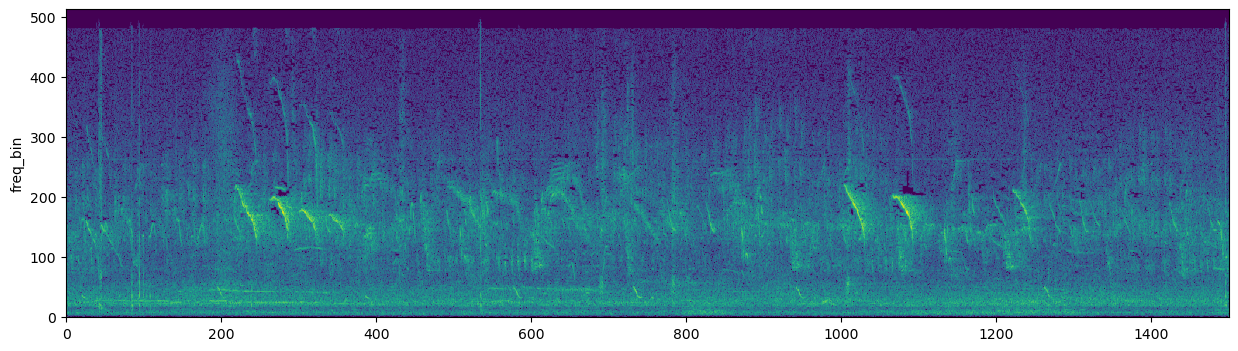

In [7]:
class Spcetrogram:
    def __init__(self, file_path):
        self.file_path = file_path
        
    def load_data(self):
        data, sample_rate = torchaudio.load(self.file_path)
        print(data.shape, sample_rate) # Ts=1/fs: 31.25 µs(micro second)
        print(f'time:{data.shape[1] / sample_rate: .1f}s')

        return data, sample_rate

    def param_set(self, fs):
        win_length = int(np.ceil(fs * 0.025))
        nfft = 2 ** int(np.ceil(np.log2(win_length)))
        hop_length = int(np.ceil(fs * 0.01))
        print(f'nfft: {nfft}, win_length: {win_length}, hop_length: {hop_length}')
    
        return nfft, win_length, hop_length
    
    def create_spec(self, data, nfft, win_length, hop_length):
        # Define & Perform transform
        spec = AT.Spectrogram(
            n_fft=nfft,
            hop_length=hop_length,
            win_length=win_length
        )(data)
        
        print(spec.shape)
        print(f'number of time components: {spec.shape[2]}, number of frequency components: {spec.shape[1]}')

        return spec

    def create_imgs(self):
        data, sample_rate = self.load_data()
    
        nfft, win_length, hop_length = self.param_set(sample_rate)
    
        specgram = self.create_spec(data, nfft, win_length, hop_length)
    
        fig, ax = plt.subplots(figsize=(15, 4))
        ax.set_ylabel("freq_bin")
        ax.imshow(
            librosa.power_to_db(specgram[0]),
            origin="lower", # 원점 위치 (lower: 왼쪽 하단, upper: 왼쪽 상단)
            aspect="auto", # 이미지의 종횡비 설정 (auto: 자동, equal: 픽셀 비율 동일)
            interpolation="nearest" # 보간 방법 (nearest: 가장 가까운 픽셀값 사용)
        )

        # Figure를 파일로 저장
        fig.savefig('saved_image.png')
        
f_path = './data/train_audio/bagwea1/XC605853.ogg'
spec_obj = Spcetrogram(f_path)
spec_obj.create_imgs()